In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Training/499.5/Brain Stroke Prediction_1.zip'

Archive:  /content/drive/MyDrive/Training/499.5/Brain Stroke Prediction_1.zip
   creating: Brain Stroke Prediction/Brain_Data_Organised/
   creating: Brain Stroke Prediction/Brain_Data_Organised/Normal/
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (1).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (10).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (11).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (12).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (13).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (14).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (15).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (16).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (17).jpg  
  inflating: Brain Stroke Prediction/Brain_Data_Organised/Normal/100 (18).jpg 

In [ ]:
import os
len(os.listdir('/content/Brain Stroke Prediction/Brain_Data_Organised/Normal')), \
len(os.listdir('/content/Brain Stroke Prediction/Brain_Data_Organised/Stroke'))

(1551, 950)

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/Training/499.5/Dataset_VGG')
!cp -r '/content/Brain Stroke Prediction/Brain_Data_Organised/Normal' -d '/content/drive/MyDrive/Training/499.5/Dataset_VGG'
!cp -r '/content/Brain Stroke Prediction/Brain_Data_Organised/Stroke' -d '/content/drive/MyDrive/Training/499.5/Dataset_VGG'

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Training/499.5/Dataset_VGG', output="splitted_data", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 2501 files [00:10, 247.81 files/s]


In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/Training/499.5'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/val/ (stored 0%)
  adding: content/splitted_data/val/Stroke/ (stored 0%)
  adding: content/splitted_data/val/Stroke/83 (1).jpg (deflated 15%)
  adding: content/splitted_data/val/Stroke/93 (22).jpg (deflated 4%)
  adding: content/splitted_data/val/Stroke/91 (10).jpg (deflated 9%)
  adding: content/splitted_data/val/Stroke/72 (26).jpg (deflated 14%)
  adding: content/splitted_data/val/Stroke/67 (31).jpg (deflated 16%)
  adding: content/splitted_data/val/Stroke/73 (23).jpg (deflated 11%)
  adding: content/splitted_data/val/Stroke/79 (14).jpg (deflated 10%)
  adding: content/splitted_data/val/Stroke/69 (26).jpg (deflated 5%)
  adding: content/splitted_data/val/Stroke/70 (48).jpg (deflated 51%)
  adding: content/splitted_data/val/Stroke/87 (42).jpg (deflated 27%)
  adding: content/splitted_data/val/Stroke/89 (40).jpg (deflated 16%)
  adding: content/splitted_data/val/Stroke/80 (37).jpg (deflated 20%)
  adding: cont

In [ ]:
!cp '/content/drive/MyDrive/Training/499.5/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/val/
   creating: content/splitted_data/val/Stroke/
  inflating: content/splitted_data/val/Stroke/83 (1).jpg  
  inflating: content/splitted_data/val/Stroke/93 (22).jpg  
  inflating: content/splitted_data/val/Stroke/91 (10).jpg  
  inflating: content/splitted_data/val/Stroke/72 (26).jpg  
  inflating: content/splitted_data/val/Stroke/67 (31).jpg  
  inflating: content/splitted_data/val/Stroke/73 (23).jpg  
  inflating: content/splitted_data/val/Stroke/79 (14).jpg  
  inflating: content/splitted_data/val/Stroke/69 (26).jpg  
  inflating: content/splitted_data/val/Stroke/70 (48).jpg  
  inflating: content/splitted_data/val/Stroke/87 (42).jpg  
  inflating: content/splitted_data/val/Stroke/89 (40).jpg  
  inflating: content/splitted_data/val/Stroke/80 (37).jpg  
  inflating: content/splitted_data/val/Stroke/87 (8).jpg  
  inflating: content/splitted_data/val/Stroke/94 (3).jpg  
  i

In [ ]:
!pip install scikit-plot

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Activation
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

import glob,os

In [ ]:
data_aug_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    # rotation_range=15,
    # shear_range=0.2,
    # zoom_range=0.25,
   )

In [ ]:
data_aug_valid = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [ ]:
train=data_aug_train.flow_from_directory(directory='/content/splitted_data/train',
                                         target_size=(128,128),
                                         color_mode='rgb',
                                         classes=['Normal','Stroke'],
                                         shuffle=True,
                                         class_mode='binary', 
                                         batch_size=64)

Found 1750 images belonging to 2 classes.


In [ ]:
valid=data_aug_valid.flow_from_directory(directory='/content/splitted_data/val',
                                         target_size=(128,128),
                                         color_mode='rgb',
                                         classes=['Normal','Stroke'],
                                         shuffle=False,
                                         class_mode='binary', 
                                         batch_size=64)

Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
p_model = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)
p_model.trainable=True

80150528/80134624 [==============================] - 3s 0us/step


In [ ]:
p_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(128, 128, 3)))
model.add(p_model)
model.add(Flatten())
# finalize with standard Dense, Dropout...
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
modelPath = '/content/drive/MyDrive/Training/499.5/saved_models_VGG_19/Pretrained VGG19'
if not os.path.exists(modelPath):
  os.makedirs(modelPath)
  print('Model Directory Created')
else:
  print('Model Directory Already Exists')
checkpoint = ModelCheckpoint(modelPath, monitor='val_accuracy', verbose=1, save_best_only=True)

Model Directory Created


In [ ]:
history = model.fit( 
      train,
      validation_data = valid, 
      validation_steps = len(valid), 
      shuffle = True,    
      steps_per_epoch = len(train),     
      epochs = 20,
      callbacks=[checkpoint],  
      verbose = 1) 

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 0.6982 - accuracy: 0.5857
Epoch 00001: val_accuracy improved from -inf to 0.62000, saving model to /content/drive/MyDrive/Training/499.5/saved_models_VGG_19/Pretrained VGG19
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Training/499.5/saved_models_VGG_19/Pretrained VGG19/assets
28/28 [==============================] - 57s 2s/step - loss: 0.6982 - accuracy: 0.5857 - val_loss: 0.6729 - val_accuracy: 0.6200
Epoch 2/20
28/28 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.6143
Epoch 00002: val_accuracy did not improve from 0.62000
28/28 [==============================] - 21s 736ms/step - loss: 0.6702 - accuracy: 0.6143 - val_loss: 0.6620 - val_accuracy: 0.6200
Epoch 3/20
28/28 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.6143
Epoch 00003: val_accuracy did not improve from 0.62000
28/28 [==============================] - 20s 713ms/step - loss: 0.6665 - accuracy:

In [ ]:
history = model.fit( 
      train,
      validation_data = valid, 
      validation_steps = len(valid), 
      shuffle = True,    
      steps_per_epoch = len(train),     
      epochs = 60,
      callbacks=[checkpoint],  
      verbose = 1) 

Epoch 1/60
28/28 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8457
Epoch 00001: val_accuracy did not improve from 0.81200
28/28 [==============================] - 31s 1s/step - loss: 0.3537 - accuracy: 0.8457 - val_loss: 0.4658 - val_accuracy: 0.7920
Epoch 2/60
28/28 [==============================] - ETA: 0s - loss: 0.3641 - accuracy: 0.8297
Epoch 00002: val_accuracy improved from 0.81200 to 0.85600, saving model to /content/drive/MyDrive/Training/499.5/saved_models_VGG_19/Pretrained VGG19
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Training/499.5/saved_models_VGG_19/Pretrained VGG19/assets
28/28 [==============================] - 25s 889ms/step - loss: 0.3641 - accuracy: 0.8297 - val_loss: 0.3726 - val_accuracy: 0.8560
Epoch 3/60
28/28 [==============================] - ETA: 0s - loss: 0.3108 - accuracy: 0.8680
Epoch 00003: val_accuracy did not improve from 0.85600
28/28 [==============================] - 20s 695ms/step - loss: 0.3108 - accura

In [ ]:
import pickle
with open('/content/drive/MyDrive/Training/499.5/saved_models_VGG_19/Pretrained VGG19/saved_model.pb', 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    #auc = history['auc']
    #val_auc = history['accuracy']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(18, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc',marker = 'p',color='green')
    plt.plot(x,val_acc, 'r', label='Validation acc',marker = 'p',color='red')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right' )
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss',marker = 'p',color='green')
    plt.plot(x, val_loss, label='Validation loss',marker = 'p',color='red')
    plt.title('Training and Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('curve.jpg',dpi=600)
    #plt.subplot(1, 3, 3)
    #plt.plot(x, auc, 'b', label='Training loss',marker = 'p',color='green')
    #plt.plot(x, val_auc, 'r', label='Validation loss',marker = 'p',color='red')
    #plt.title('Training and Validation AUC')
    #plt.xlabel('Epoch')
    #plt.ylabel('AUC')
    #plt.legend()
    #plt.savefig('curve.jpg',dpi=600)

# plot_history(modelHistory.history)

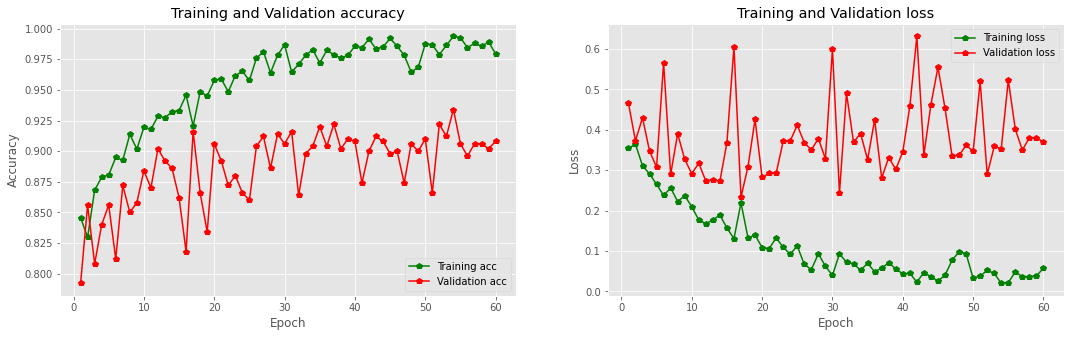

In [ ]:
import pickle
with open('/content/drive/MyDrive/Training/499.5/saved_models_VGG_19/Pretrained VGG19/saved_model.pb', 'rb') as file_pi:
  dct=pickle.load(file_pi)

plot_history(dct)